In [215]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import math
data = np.load("C:\\Users\\baljyot\\Downloads\\mnist.npz")
# data = np.load("/home/iiitd/Downloads/mnist.npz")
x_train=data['x_train']
y_train=data['y_train']
x_test=data['x_test']
y_test=data['y_test']

indices = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))[0]
x_train = x_train[indices]/255
y_train = y_train[indices]
indices = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))[0]
x_test = x_test[indices]/255
y_test = y_test[indices]

print("Shape of new_x_train:", x_train.shape)
print("Shape of new_y_train:", x_test.shape)


Shape of new_x_train: (18623, 28, 28)
Shape of new_y_train: (3147, 28, 28)


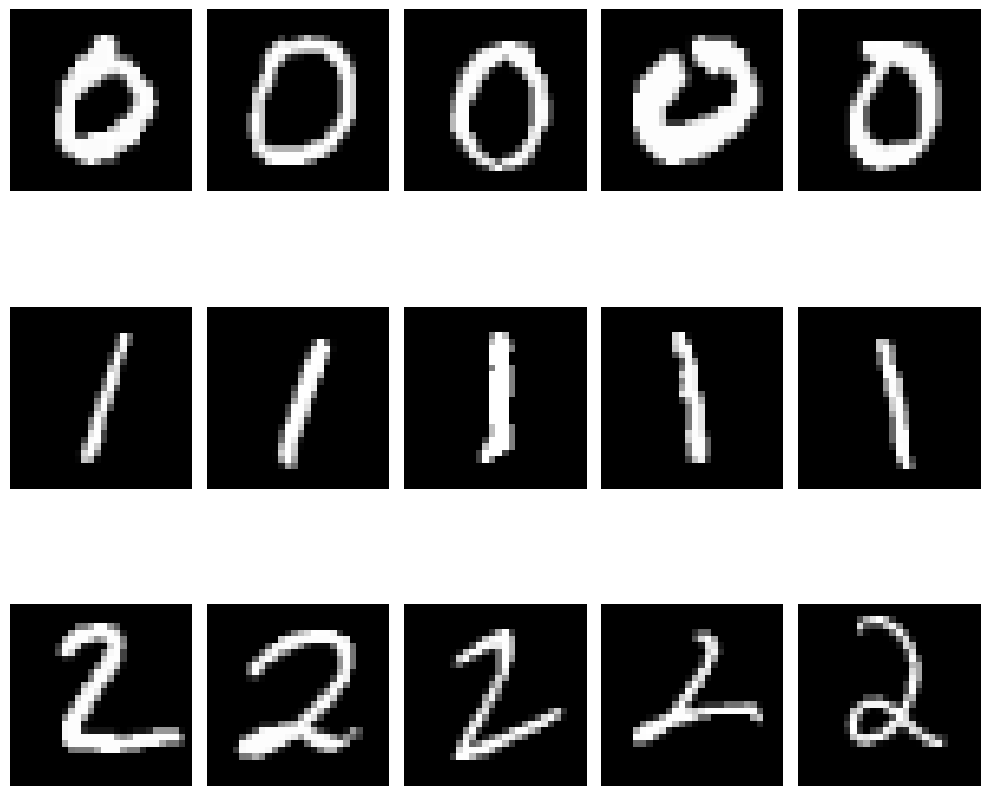

In [216]:
fig, axes = plt.subplots(3, 5, figsize=(10, 10))
axes = axes.flatten()

for k in range(3):  # Iterate through classes 0, 1, and 2
    index = np.where(y_test == k)[0]
    for i in range(5):
        ax = axes[k * 5 + i]
        ax.imshow(x_test[index[i]], cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [217]:
flattened=[]
for i in range(len(x_train)):
    flattened.append(x_train[i].flatten())
x_train=np.array(flattened)
flattened=[]
for i in range(len(x_test)):
    flattened.append(x_test[i].flatten())
x_test=np.array(flattened)
print("Shape of new_x_train:", x_test.shape)

Shape of new_x_train: (3147, 784)


In [218]:

print(len(np.where(y_train == 0)[0]))

print(len(np.where(y_train == 1)[0]))

print(len(np.where(y_train == 2)[0]))

5923
6742
5958


In [219]:
x_train=np.transpose(x_train)
sums=[]
centralisedMean=np.mean(x_train,axis=1)

print("Shape of new_x_train:", x_train.shape)
centralisedData=[]
for i in range(x_train.shape[0]):
    l=[]
    # for j in range(60000):
    for j in range(x_train.shape[1]):
        l.append(x_train[i][j]- centralisedMean[i])
    centralisedData.append(l)
centralisedMean=np.array(np.mean(centralisedData,axis=1))

S=np.matmul( centralisedData ,np.transpose(centralisedData))/18622

eigenvalues, eigenvectors = np.linalg.eigh(S)
eigenvalues = eigenvalues[::-1]
U = np.flip(eigenvectors, axis=1)

nUp=U[:,:10]

x_proj=np.matmul(nUp.T,x_train-x_train.mean(axis=1)[:,np.newaxis])

Shape of new_x_train: (784, 18623)


In [220]:
print(x_proj.T.shape)
x_proj.T

(18623, 10)


array([[ 4.46819371,  2.30562719,  2.29138461, ..., -0.43534952,
        -0.20762557,  0.03236219],
       [-3.41183773, -1.03678316,  0.80070694, ...,  0.89875874,
        -0.25671653,  0.88807734],
       [ 0.78832332, -2.50183724,  1.57521276, ...,  1.25991927,
         2.52840623, -0.11401768],
       ...,
       [ 3.42105396,  1.37305021,  4.71123058, ..., -1.270679  ,
        -1.62796394,  1.01553682],
       [-0.32309651, -1.73250075,  2.23520411, ..., -0.55388041,
         0.65827618, -0.95868261],
       [-3.20182592,  0.39477996,  0.3697872 , ...,  0.32095889,
        -0.51223972,  1.00186117]])

In [221]:
x_test.shape
x_test=np.transpose(x_test)
# sums=[]
# centralisedMean=np.mean(x_test,axis=1)

# print("Shape of new_x_train:", x_test.shape)
# centralisedData=[]
# for i in range(x_test.shape[0]):
#     l=[]
#     # for j in range(60000):
#     for j in range(x_test.shape[1]):
#         l.append(x_test[i][j]- centralisedMean[i])
#     centralisedData.append(l)
# centralisedMean=np.array(np.mean(centralisedData,axis=1))

# S=np.matmul( centralisedData ,np.transpose(centralisedData))/3146

# eigenvalues, eigenvectors = np.linalg.eigh(S)
# eigenvalues = eigenvalues[::-1]
# U = np.flip(eigenvectors, axis=1)
# U = np.ones(U.shape)-U
# nUp=U[:,:2]

x_proj_test=np.matmul(nUp.T,x_test-x_test.mean(axis=1)[:,np.newaxis])

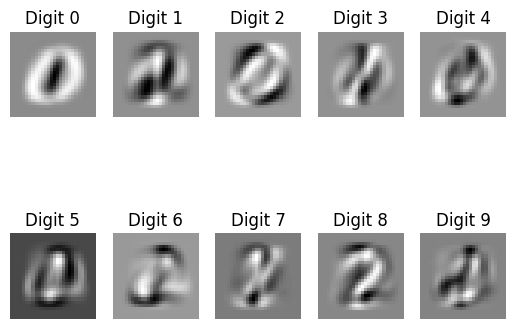

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming U is your dataset containing images reshaped to 28x28
# Iterate over digits from 0 to 9
for digit in range(10):
    # Find the first occurrence of the digit in your dataset
    
    # Extract and reshape the image
    image = U[:, digit].reshape(28, 28)
    # Plot the image
    plt.subplot(2, 5, digit+1)  # Adjust subplot position for each digit
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit {digit}')
    plt.axis('off')

# Show the plot
plt.show()


In [222]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.p = None
        self.wG_r=None
        self.wG_l=None
        self.leaf_value=None
        self.threshold=None



In [223]:
class Region:
    def __init__(self):
        self.one=0
        self.two=0
        self.zero=0
        self.total=0
        self.gini=0
    def add_value(self, input_value):
        self.total+=1
        if input_value == 1:
            self.one += 1
        elif input_value == 2:
            self.two += 1
        elif input_value == 0:
            self.zero += 1
    def calc_gini_index(self):
        
        p1=self.one/self.total
        p2=self.two/self.total
        p3=self.zero/self.total

        self.gini=p1*(1-p1)+p2*(1-p2)+p3*(1-p3)

        return self.gini
    def predict(self):
        if (self.one > self.two and self.one >self.zero):
            return 1
        if (self.two > self.one and self.two >self.zero):
            return 2
        if (self.zero > self.two and self.zero >self.one):
            return 0
    def print(self):
        print("0 : ",self.zero)
        print("1 : ",self.one)

        print("2 : ",self.two)


        

In [224]:
import copy


def get_best_split(dataset,y_test):
    # dataset.shape=10 * (num of datapoints)
    # print(dataset.shape)

    best_split_gini=-2
    best_split={}
    for p in range(10):
        # print("for ",p)
        # threshold=np.mean(dataset[p])
        threshold=(np.max(dataset[p])+np.min(dataset[p]))/2

        print("threshold ", threshold)

        left_region=Region()
        right_region=Region()
        for i in range(len(dataset[p])):
            if (dataset[p][i]<=threshold):
                left_region.add_value(y_test[i])
            else:
                right_region.add_value(y_test[i])
        # print("printing regions")
        # left_region.print()
        # right_region.print()
        w_l=left_region.total/(left_region.total+right_region.total)
        w_r=1-w_l
        G_l=left_region.calc_gini_index()
        G_r=right_region.calc_gini_index()
        curr_gini=w_l*G_l+w_r*G_r
        # print("gini ", curr_gini)

        if (best_split_gini==-2 or curr_gini<best_split_gini):
            best_split['wg_l']=w_l*G_l
            best_split['wg_r']=w_r*G_r
            best_split['p']=p
            best_split['threshold']=threshold
            column_p = dataset[p]
            indices_l = np.where(column_p <= threshold)[0]
            indices_r=np.where(column_p > threshold)[0]
            best_split['left_data']=dataset[:, indices_l]
            best_split['left_data_train']=y_test[indices_l]
            best_split['right_data']=dataset[: , indices_r]
            best_split['right_data_train']=y_test[indices_r]

            best_split['left_region']=copy.deepcopy(left_region)
            best_split['right_region']=copy.deepcopy(right_region)
            best_split_gini=curr_gini

    
    return best_split
get_best_split(x_proj, y_train)


threshold  2.267581280526632
threshold  -1.1796384608349548
threshold  -0.05696346707710376
threshold  -0.1148244393707416
threshold  -0.5150381182467911
threshold  0.6376810182712536
threshold  0.15051753226797837
threshold  0.7094848553565098
threshold  -0.18514399267235504
threshold  -0.16955918796314995


{'wg_l': 0.39836656160290973,
 'wg_r': 0.045555425990702454,
 'p': 0,
 'threshold': 2.267581280526632,
 'left_data': array([[-3.41183773,  0.78832332, -3.10992229, ...,  1.67616801,
         -0.32309651, -3.20182592],
        [-1.03678316, -2.50183724,  1.93871143, ..., -3.08964901,
         -1.73250075,  0.39477996],
        [ 0.80070694,  1.57521276, -0.64587146, ...,  3.37505356,
          2.23520411,  0.3697872 ],
        ...,
        [ 0.89875874,  1.25991927,  2.11406798, ..., -0.53508284,
         -0.55388041,  0.32095889],
        [-0.25671653,  2.52840623, -0.92939233, ...,  1.36070147,
          0.65827618, -0.51223972],
        [ 0.88807734, -0.11401768,  0.78596333, ..., -2.35068814,
         -0.95868261,  1.00186117]]),
 'left_data_train': array([1, 2, 1, ..., 2, 2, 1], dtype=uint8),
 'right_data': array([[ 4.46819371,  4.48346948,  2.30176613, ...,  4.07125203,
          3.49461402,  3.42105396],
        [ 2.30562719,  2.44019965, -1.02919714, ...,  0.47130169,
          

In [225]:
def build_tree(dataset, num_leaf_nodes,y_train):
    # dataset.shape=10 * (num of datapoints)
    root = Node()
    curr=root
    curr_dataset=dataset
    curr_y_train=y_train
    for i in range(1,num_leaf_nodes):
        best_split=get_best_split(curr_dataset,curr_y_train)
        curr.p=best_split['p']
        curr.threshold=best_split['threshold']
        if(i==num_leaf_nodes-1):
            left=Node()
            right=Node()
            left.leaf_value=best_split['left_region'].predict()
            right.leaf_value=best_split['right_region'].predict()
            curr.left=left
            curr.right=right

        elif (best_split['wg_l']<=best_split['wg_r']):
            left=Node()
            left.leaf_value=best_split['left_region'].predict()
            right=Node()
            # curr=right
            curr_dataset=best_split['right_data']
            curr_y_train=best_split['right_data_train']
            curr.left=left
            curr.right=right
            curr=right

        else:
            right=Node()
            right.leaf_value=best_split['right_region'].predict()
            left=Node()
            # curr=left
            curr_dataset=best_split['left_data']
            curr_y_train=best_split['left_data_train']
            curr.left=left
            curr.right=right
            curr=left
    return root

        

In [226]:
def prediction(root,point):
    # point = 1*10
    while(True):
        if(root.leaf_value!=None):
            return root.leaf_value
        else:
            if (point[root.p]<=root.threshold):
                root=root.left
            else:
                root=root.right


In [227]:
def accuracy(root, X,Y):
    # x=10 * 18623
    X=X.T
    acurracies=[[0,0] for i in range(3) ]
    for i in range(X.shape[0]):
        acurracies[Y[i]][1]+=1
        if Y[i]==prediction(root, X[i]):
            acurracies[Y[i]][0]+=1
    return acurracies

In [228]:
root=build_tree(x_proj, 3, y_train)
acc=accuracy(root, x_proj,y_train)
tot=0
for i in acc:
    tot+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(tot/3)

threshold  2.267581280526632
threshold  -1.1796384608349548
threshold  -0.05696346707710376
threshold  -0.1148244393707416
threshold  -0.5150381182467911
threshold  0.6376810182712536
threshold  0.15051753226797837
threshold  0.7094848553565098
threshold  -0.18514399267235504
threshold  -0.16955918796314995
threshold  -1.1272131391495623
threshold  -1.6078282309792373
threshold  0.2778316272460799
threshold  -0.1148244393707416
threshold  -0.1447500045984671
threshold  0.405370827768746
threshold  0.004198238514172115
threshold  0.7094848553565098
threshold  -0.18514399267235504
threshold  -0.16955918796314995
83.47121391186899
99.33254227232275
64.09869083585096
82.30081567334757


In [229]:
root=build_tree(x_proj, 3, y_train)
acc=accuracy(root, x_proj_test,y_test)
tot=0
for i in acc:
    tot+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(tot/3)

threshold  2.267581280526632
threshold  -1.1796384608349548
threshold  -0.05696346707710376
threshold  -0.1148244393707416
threshold  -0.5150381182467911
threshold  0.6376810182712536
threshold  0.15051753226797837
threshold  0.7094848553565098
threshold  -0.18514399267235504
threshold  -0.16955918796314995
threshold  -1.1272131391495623
threshold  -1.6078282309792373
threshold  0.2778316272460799
threshold  -0.1148244393707416
threshold  -0.1447500045984671
threshold  0.405370827768746
threshold  0.004198238514172115
threshold  0.7094848553565098
threshold  -0.18514399267235504
threshold  -0.16955918796314995
84.79591836734693
99.55947136563876
62.01550387596899
82.1236312029849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


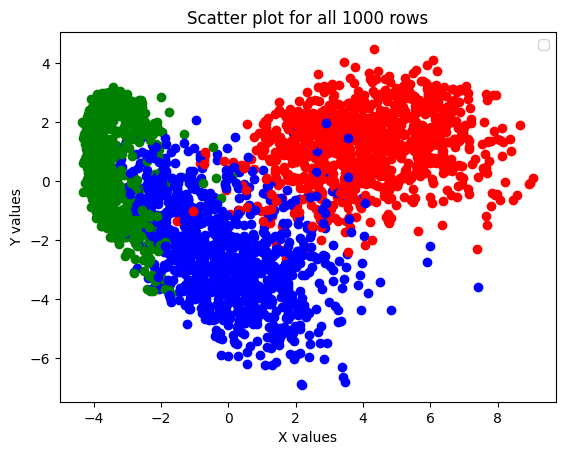

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your matrix is named 'data_matrix'
# and 'y_test' contains the labels for each row

num_rows = (x_proj_test.T).shape[0]

# Define colors for each label
label_colors = ['r', 'g', 'b']  # Red, Green, Blue

# Plot each row individually
for i in range(int(num_rows)):
    # Extract x and y data points from the first two columns
    x_values = x_proj_test.T[i][0]  # Assuming first column contains x values
    y_values = x_proj_test.T[i][1]  # Assuming second column contains y values
    
    # Get the label for the current row
    label = y_test[i]
    
    # Plot the data points with color based on the label
    plt.scatter(x_values, y_values, color=label_colors[label])

# Add labels
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot for all 1000 rows')


# Add legend
plt.legend()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


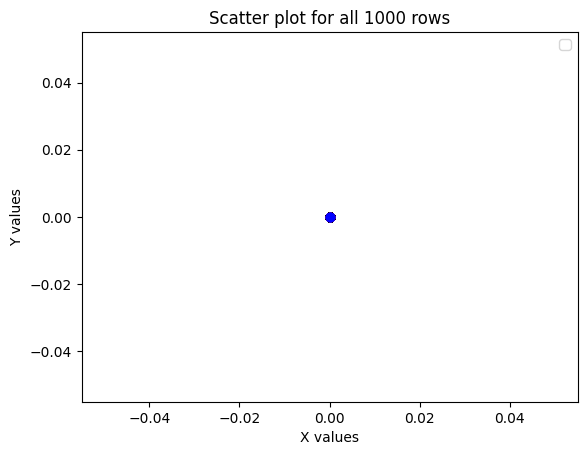

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your matrix is named 'data_matrix'
# and 'y_test' contains the labels for each row

num_rows = (x_test.T).shape[0]

# Define colors for each label
label_colors = ['r', 'g', 'b']  # Red, Green, Blue

# Plot each row individually
for i in range(int(num_rows)):
    # Extract x and y data points from the first two columns
    x_values = x_test.T[i][0]  # Assuming first column contains x values
    y_values = x_test.T[i][1]  # Assuming second column contains y values
    
    # Get the label for the current row
    label = y_train[i]
    
    # Plot the data points with color based on the label
    plt.scatter(x_values, y_values, color=label_colors[label])

# Add labels
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot for all 1000 rows')


# Add legend
plt.legend()

# Show the plot
plt.show()


In [133]:
print(U[:,0][0:2])
print(U[:,1][0:2])


[1. 1.]
[1. 1.]


In [231]:
#building datasets
from typing import Counter


new_x_train=x_proj.T
size= int((y_train.shape)[0]/5)
print("Shape of new_y_train:",size )

D1=new_x_train[:size].T
D2=new_x_train[size:2*size].T

D3=new_x_train[2*size:3*size].T
D4=new_x_train[3*size:4*size].T

D5=new_x_train[4*size:5*size].T

D1_y=y_train[:size]
D2_y=y_train[size:2*size]

D3_y=y_train[2*size:3*size]
D4_y=y_train[3*size:4*size]

D5_y=y_train[4*size:5*size]

# print(len(D1[0])

D = np.vstack((D1, D2, D3, D4, D5))
print("Shape of matrix D:", D1.shape)
print(D1_y.shape)
r1=build_tree(D1, 3, D1_y)
r2=build_tree(D2, 3, D2_y)
r3=build_tree(D3, 3, D3_y)

r4=build_tree(D4, 3, D4_y)

r5=build_tree(D5, 3, D5_y)



Shape of new_y_train: 3724
Shape of matrix D: (10, 3724)
(3724,)
threshold  2.3461582670415178
threshold  -1.3202599579922731
threshold  0.28980946441974975
threshold  0.021833646360051695
threshold  -0.428367968898014
threshold  0.7570936013040646
threshold  0.33469058409679997
threshold  0.4269173655037035
threshold  -0.26158442518586544
threshold  -0.29301354641018085
threshold  -1.009990703305305
threshold  -1.6251811053089806
threshold  -0.003754358932269497
threshold  0.021833646360051695
threshold  0.07245643544458025
threshold  0.5571262754775654
threshold  0.10245669119336975
threshold  0.4269173655037035
threshold  -0.26158442518586544
threshold  -0.24448876837044686
threshold  2.301102008704741
threshold  -1.0099646093043617
threshold  -0.20359247921514045
threshold  0.04904615446038152
threshold  -0.5072170002016465
threshold  0.23250076242963225
threshold  0.24311196225315856
threshold  0.8802480655418672
threshold  0.08804257960474393
threshold  -0.1840358895704426
thresh

In [232]:
def majority_voting(predictions):
    
    class_counts = Counter(predictions)
    # Find the class with the maximum count
    majority_class, majority_count = class_counts.most_common(1)[0]
    if(majority_count<=3):
        print(predictions,majority_count)
    # If at least 3 trees predict the same class, use that class as the final prediction
    if majority_count >= 3:
        return majority_class
    else:
        print(predictions)
        print(majority_class)
        return majority_class
 

In [233]:

dataset=x_proj_test
dataset=dataset.T
accuracies=[[0,0] for i in range(3) ]
for i in range(dataset.shape[0]):
    accuracies[y_test[i]][1]+=1
    p1=prediction(r1,dataset[i])
    p2=prediction(r2,dataset[i])
    p3=prediction(r3,dataset[i])
    p4=prediction(r4,dataset[i])
    p5=prediction(r5,dataset[i])

    predictions = [p1, p2, p3, p4, p5]  
    # print(predictions)

    final_prediction = majority_voting(predictions)

    # Check if the final prediction matches the ground truth
    if y_test[i] == final_prediction:
        # Increment correct count for the ground truth class
        accuracies[y_test[i]][0] += 1


acc=accuracies
total=0
for i in acc:
    total+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(total/3)

[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
[2, 2, 0, 2, 0] 3
[2, 2, 0, 2, 0] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
[2, 2, 0, 2, 0] 3
[1, 1, 2, 1, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
[1, 1, 2, 2, 2] 3
[1, 1, 2, 1, 2] 3
[2, 2, 0, 2, 0] 3
84.18367346938776
99.55947136563876
60.94961240310077
81.5642524127091
